# **Text Classification Using the Stanford SST Sentiment Dataset**

Github link: https://github.com/emma2763/Machine-Learning-Projects/blob/311de03e7cd161fb01d5527f6b6d7f06699ccd95/my2763_assignment3.ipynb

In [ ]:
%%shell
jupyter nbconvert --to html /content/my2763_assignment3.ipynb

[NbConvertApp] Converting notebook /content/my2763_assignment3.ipynb to html
[NbConvertApp] Writing 7265808 bytes to /content/my2763_assignment3.html


# Explore dataset
Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful. Who could benefit from a model like this? Explain.

In [ ]:
#install aimodelshare library
! pip install aimodelshare==0.0.189

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.8/967.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 

Note: After installing aimodelshare, use Runtime > restart runtime to restart your Colab session.

## Import data and set up X_train, X_test, y_train objects

In [ ]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest') 


Data downloaded successfully.


In [ ]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

X_train=pd.read_csv("sst2_competition_data/X_train.csv", squeeze=True)
X_test=pd.read_csv("sst2_competition_data/X_test.csv", squeeze=True)

y_train_labels=pd.read_csv("sst2_competition_data/y_train_labels.csv", squeeze=True)

# ohe encode Y data
y_train = pd.get_dummies(y_train_labels)

X_train.head()

0    The Rock is destined to be the 21st Century 's...
1    The gorgeously elaborate continuation of `` Th...
2    Singer/composer Bryan Adams contributes a slew...
3                 Yet the act is still charming here .
4    Whether or not you 're enlightened by any of D...
Name: text, dtype: object

In [ ]:
len(X_train)

6920

In [ ]:
len(X_test)

1821

In [ ]:
y_train.head()

In [ ]:
y_train.hist() 

## Discuss dataset

The Stanford SST Sentiment Dataset contains movie reviews and labels of positive or negetive attitudes. Predicting labels is useful for rating movies, which benefits people who search for a good movie online. It can also help film industry to get feedback from audience and improve their movies.

## Preprocess data

In [ ]:
# This preprocessor function makes use of the tf.keras tokenizer
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

# Build vocabulary from training text data
tokenizer = Tokenizer(num_words=12000)
tokenizer.fit_on_texts(X_train)

# preprocessor tokenizes words and makes sure all documents have the same length
def preprocessor(data, maxlen=100, max_words=12000):

    sequences = tokenizer.texts_to_sequences(data)

    word_index = tokenizer.word_index
    X = pad_sequences(sequences, maxlen=maxlen)

    return X

print(preprocessor(X_train).shape)
print(preprocessor(X_test).shape)

(6920, 100)
(1821, 100)


# Run prediction models

Run at least three prediction models to try to predict the SST sentiment dataset well.

Use an Embedding layer and LSTM layers in at least one model.

Use an Embedding layer and Conv1d layers in at least one model.

Use transfer learning with glove embeddings for at least one of these models.

Discuss which models performed better and point out relevant hyper-parameter values for successful models.

Submit your best three models to the leader board for the SST Model Share competition.

## Model 1 Embedding and LSTM

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 16, input_length=100))
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            192000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                6272      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 198,338
Trainable params: 198,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
173/173 [==============================] - 9s 38ms/step - loss: 0.6324 - acc: 0.6346 - val_loss: 0.7464 - val_acc: 0.5072
Epoch 2/10
173/173 [==============================] - 5s 30ms/step - loss: 0.4600 - acc: 0.7962 - val_loss: 0.5008 - val_acc: 0.8223
Epoch 3/10
173/173 [==========================

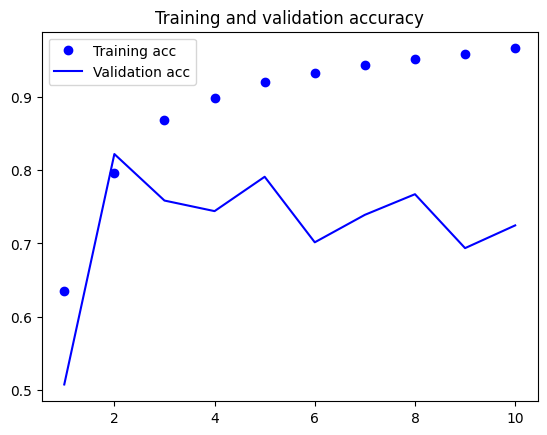

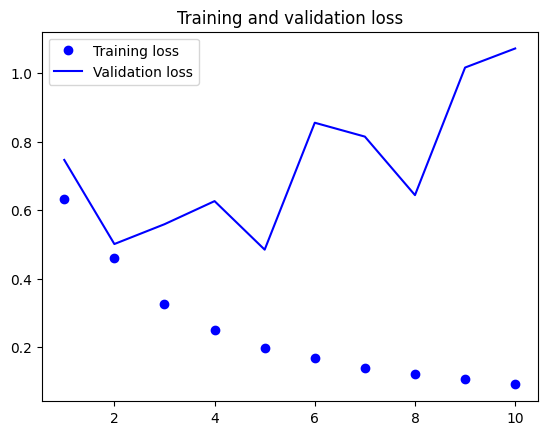

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Clearly, there is overfitting problem. So next I try to train fewer epochs.

### 1.1 5 epochs

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 16, input_length=100))
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            192000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                6272      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 198,338
Trainable params: 198,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
173/173 [==============================] - 6s 26ms/step - loss: 0.6506 - acc: 0.6192 - val_loss: 0.8025 - val_acc: 0.3172
Epoch 2/5
173/173 [==============================] - 7s 39ms/step - loss: 0.4794 - acc: 0.7822 - val_loss: 0.6187 - val_acc: 0.7478
Epoch 3/5
173/173 [=============================

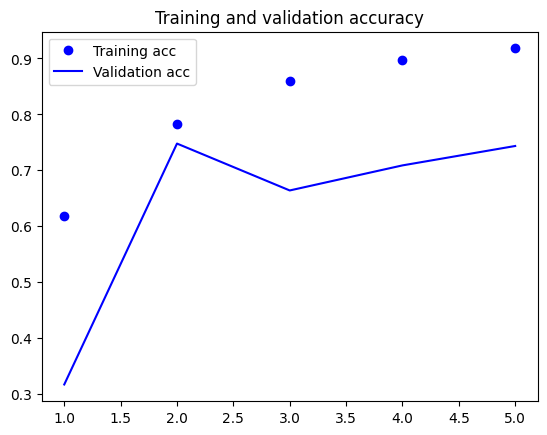

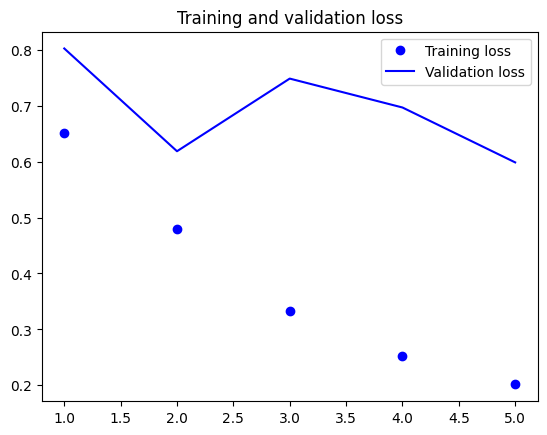

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 1.2 Add Flatten layer

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 16, input_length=100))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            192000    
                                                                 
 lstm_3 (LSTM)               (None, 32)                6272      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 198,338
Trainable params: 198,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
173/173 [==============================] - 9s 36ms/step - loss: 0.6452 - acc: 0.6230 - val_loss: 0.7397 - val_acc: 0.5101
Epoch 2/5
173/173 [=============================

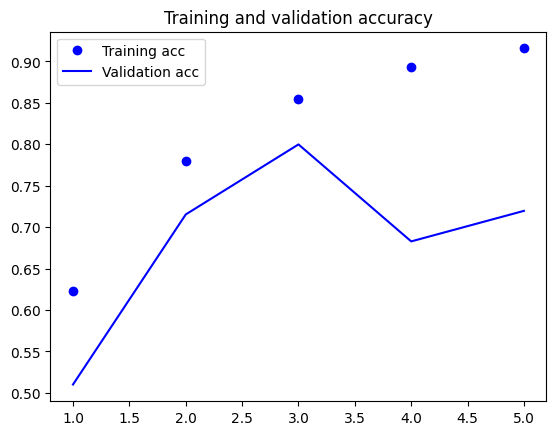

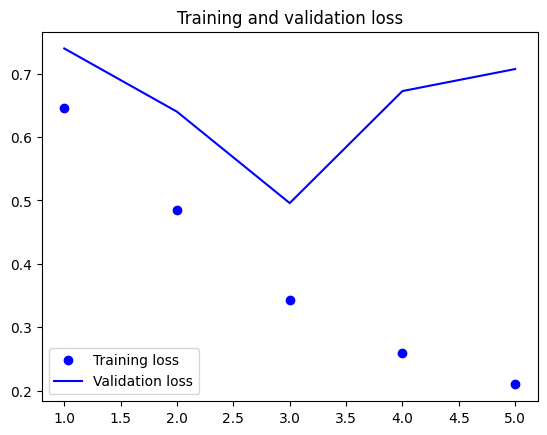

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Adding a Flatten layer does not help.

### 1.3 More LSTM layers

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 16, input_length=100))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 16)            192000    
                                                                 
 lstm_5 (LSTM)               (None, 50, 32)            6272      
                                                                 
 lstm_6 (LSTM)               (None, 50, 64)            24832     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 256,258
Trainable params: 256,258
Non-tr

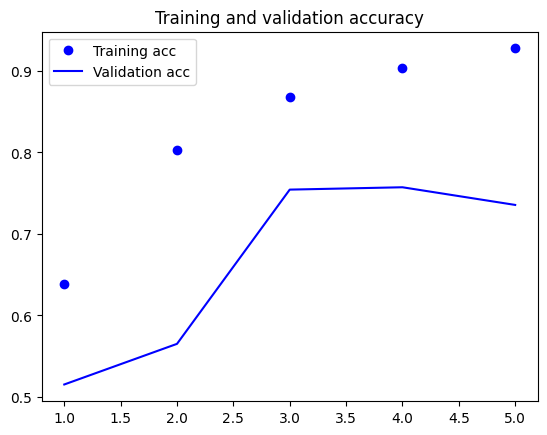

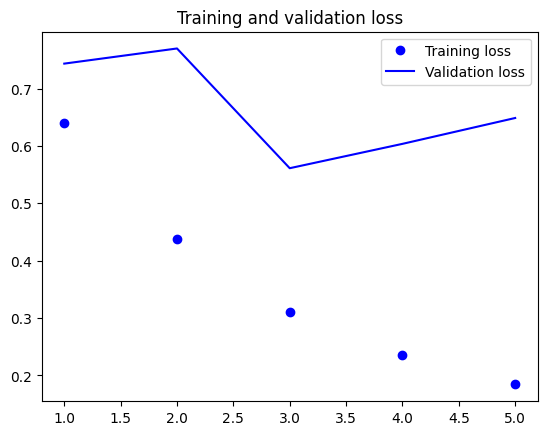

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Adding two LSTM layers improves model performance.

### 1.4 Use dropout to fight overfitting

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 64, input_length=100))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           768000    
                                                                 
 lstm_4 (LSTM)               (None, 100, 32)           12416     
                                                                 
 lstm_5 (LSTM)               (None, 100, 64)           24832     
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 817,730
Trainable params: 817,730
Non-tr

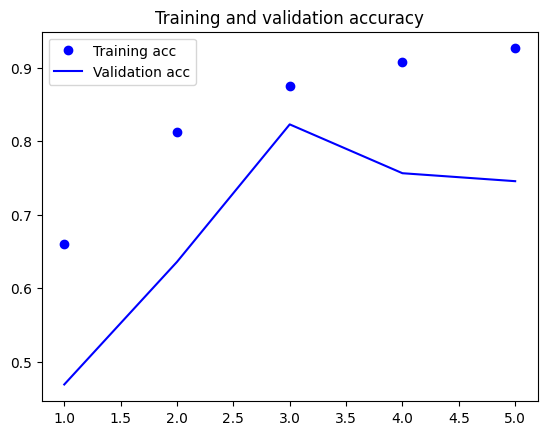

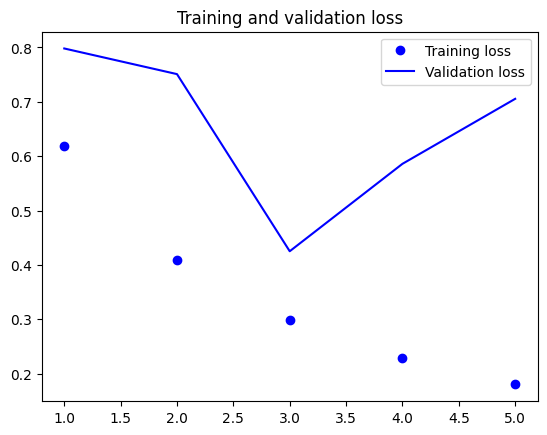

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Dropout does not seem to help fight overfitting a lot though.

### Submit model

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials
    
apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this specific Playground

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1: 

#-- Generate predicted y values (Model 1)
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

57/57 [==============================] - 6s 95ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 211

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Model 2 Embedding and Conv1D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

model = Sequential()
model.add(Embedding(12000, 64, input_length=100))
model.add(Conv1D(32, 7, activation='relu')) 
model.add(MaxPooling1D(5)) 
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           768000    
                                                                 
 conv1d_2 (Conv1D)           (None, 94, 32)            14368     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 18, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 12, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense (Dense)               (None, 2)                

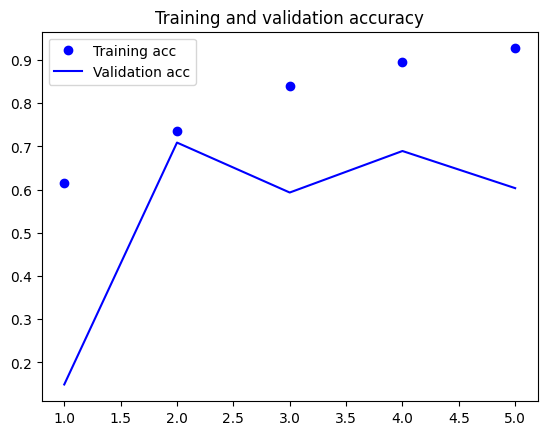

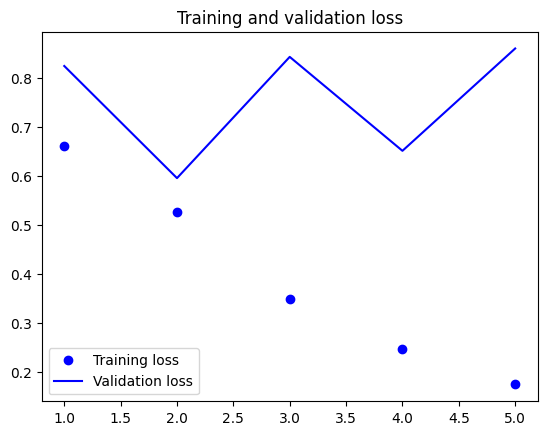

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Unfortunately, Conv1D does not work well in this SST dataset.

### 2.1 Combine Conv1D and LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, LSTM, Flatten

model = Sequential()
model.add(Embedding(12000, 64, input_length=100))
model.add(Conv1D(32, 7, activation='relu')) 
model.add(MaxPooling1D(5)) 
model.add(Conv1D(32, 7, activation='relu'))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 64)           768000    
                                                                 
 conv1d_6 (Conv1D)           (None, 94, 32)            14368     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 18, 32)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 12, 32)            7200      
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                      

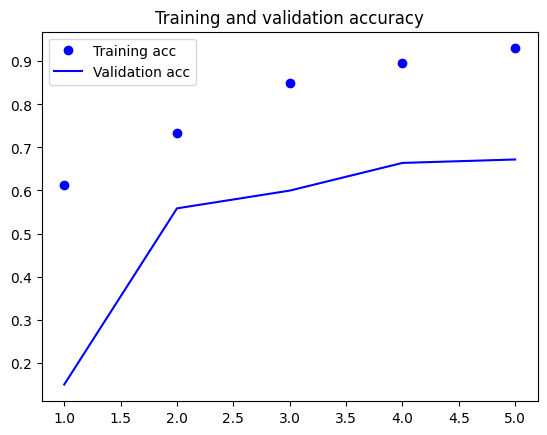

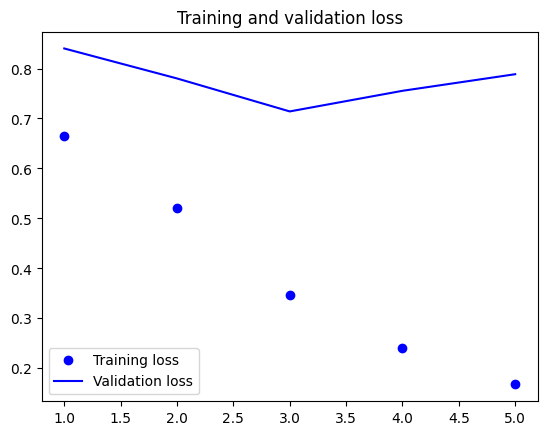

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Combining Conv1D and LSTM is even worse.

### Submit model

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials
    
apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this specific Playground

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 2: 

#-- Generate predicted y values (Model 2)
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

57/57 [==============================] - 1s 8ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 213

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Model 3 Transfer learning with glove embeddings

In [ ]:
# Download Glove embedding matrix weights
! wget http://nlp.stanford.edu/data/wordvecs/glove.6B.zip

--2023-04-16 19:46:32--  http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.6B.zip [following]
--2023-04-16 19:46:33--  https://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip [following]
--2023-04-16 19:46:33--  https://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182753 (822M) [app

In [ ]:
! unzip glove.6B.zip 

Archive:  glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [ ]:
# Extract embedding data for 100 feature embedding matrix
import os
glove_dir = os.getcwd()

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [ ]:
# Build embedding matrix
embedding_dim = 100 

embedding_matrix = np.zeros((12000, embedding_dim))
word_index = tokenizer.word_index
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < 12000:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, embedding_dim, input_length=100))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Add weights in same manner as transfer learning and turn of trainable option before fitting model to freeze weights.
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1200000   
                                                                 
 lstm_1 (LSTM)               (None, 100, 32)           17024     
                                                                 
 lstm_2 (LSTM)               (None, 100, 64)           24832     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,254,338
Trainable params: 1,254,338
No

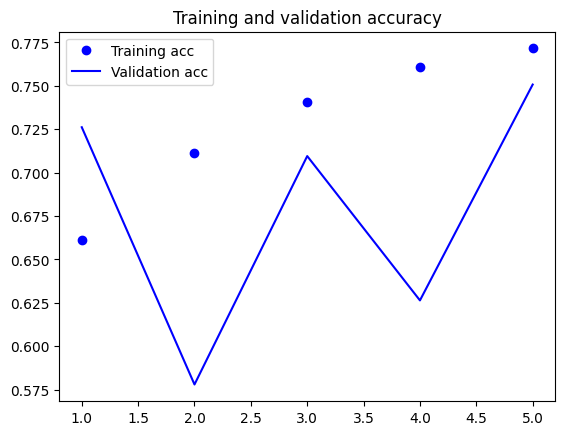

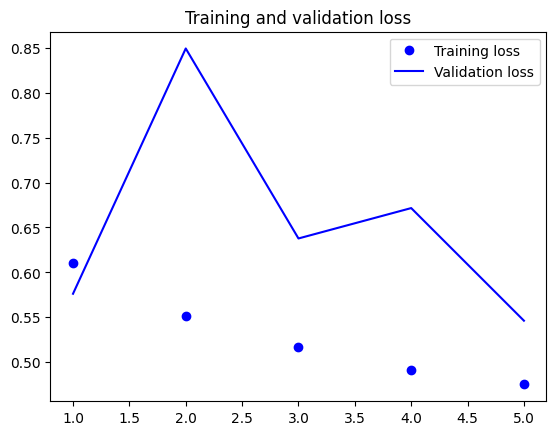

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Transfer learning is promising. It does better than all previous models.

### Submit model

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials
    
apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this specific Playground

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 3: 

#-- Generate predicted y values (Model 3)
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

57/57 [==============================] - 4s 54ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 210

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Model 3

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, embedding_dim, input_length=100))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          1200000   
                                                                 
 lstm_14 (LSTM)              (None, 100, 32)           17024     
                                                                 
 lstm_15 (LSTM)              (None, 100, 64)           24832     
                                                                 
 lstm_16 (LSTM)              (None, 32)                12416     
                                                                 
 flatten_6 (Flatten)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,254,338
Trainable params: 1,254,338
No

In [ ]:
# Add weights in same manner as transfer learning and turn of trainable option before fitting model to freeze weights.
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          1200000   
                                                                 
 lstm_14 (LSTM)              (None, 100, 32)           17024     
                                                                 
 lstm_15 (LSTM)              (None, 100, 64)           24832     
                                                                 
 lstm_16 (LSTM)              (None, 32)                12416     
                                                                 
 flatten_6 (Flatten)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,254,338
Trainable params: 54,338
Non-t

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/5
173/173 [==============================] - 74s 386ms/step - loss: 0.6034 - acc: 0.6705 - val_loss: 0.5409 - val_acc: 0.7435
Epoch 2/5
173/173 [==============================] - 68s 390ms/step - loss: 0.5382 - acc: 0.7262 - val_loss: 0.7484 - val_acc: 0.6525
Epoch 3/5
173/173 [==============================] - 67s 385ms/step - loss: 0.5068 - acc: 0.7471 - val_loss: 0.7305 - val_acc: 0.5679
Epoch 4/5
173/173 [==============================] - 67s 389ms/step - loss: 0.4892 - acc: 0.7587 - val_loss: 0.6032 - val_acc: 0.6850
Epoch 5/5
173/173 [==============================] - 65s 376ms/step - loss: 0.4698 - acc: 0.7699 - val_loss: 0.6698 - val_acc: 0.6669


## Discussion

Overall, there is overfitting problem. I try to train fewer epochs. Adding more LSTM layers improves model performance. My Conv1D model does not work well for this dataset. Transfer learning achieves ~0.79 accuracy. Using well pretrained embeddings does help a lot. My best model is 3 LSTM layers with dropout, which achieves over 0.8 accuracy.

# Models after teamwork

After you submit your first three models, describe your best model with your team via your team slack channel.

Fit and submit up to three more models after learning from your team.

Discuss results.

## Model 4 Transfer learning with more epochs

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, embedding_dim, input_length=100))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Add weights in same manner as transfer learning and turn of trainable option before fitting model to freeze weights.
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1200000   
                                                                 
 lstm_8 (LSTM)               (None, 100, 32)           17024     
                                                                 
 lstm_9 (LSTM)               (None, 100, 64)           24832     
                                                                 
 lstm_10 (LSTM)              (None, 32)                12416     
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,254,338
Trainable params: 1,254,338
No

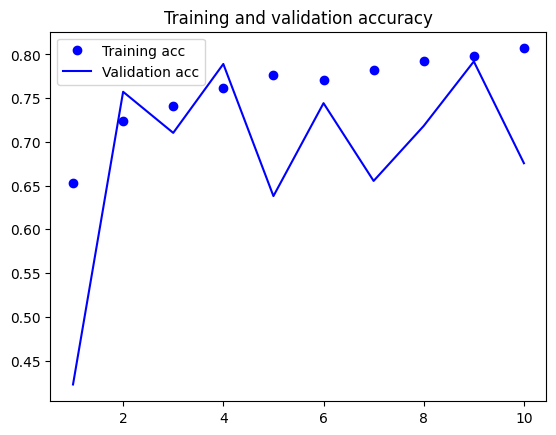

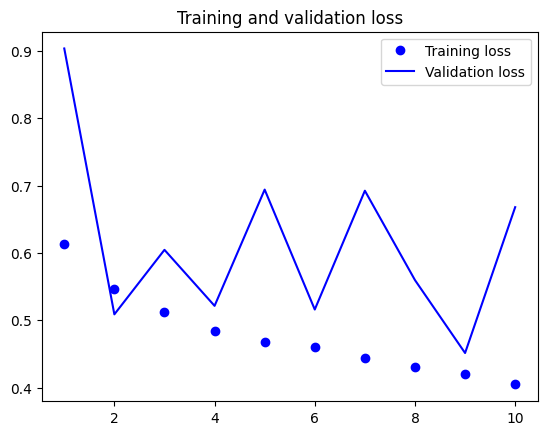

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Submit

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials
    
apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this specific Playground

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 4: 

#-- Generate predicted y values (Model 4)
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

57/57 [==============================] - 5s 59ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 217

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Model 5 Tune dropout rates

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 64, input_length=100))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.5))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 64)           768000    
                                                                 
 lstm_26 (LSTM)              (None, 100, 32)           12416     
                                                                 
 lstm_27 (LSTM)              (None, 100, 64)           24832     
                                                                 
 lstm_28 (LSTM)              (None, 32)                12416     
                                                                 
 flatten_10 (Flatten)        (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 66        
                                                                 
Total params: 817,730
Trainable params: 817,730
Non-t

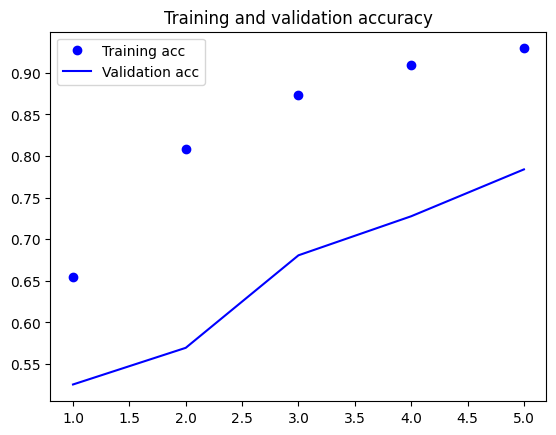

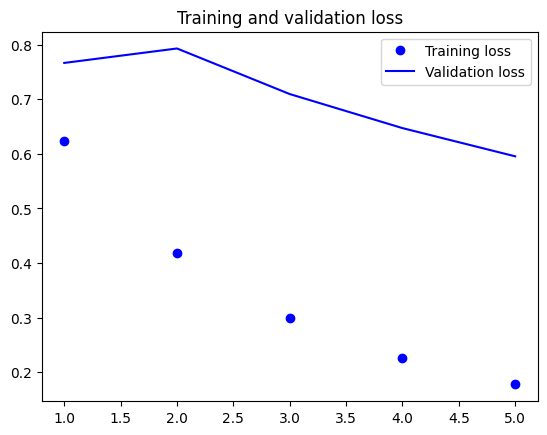

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Submit

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials
    
apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this specific Playground

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 4: 

#-- Generate predicted y values (Model 4)
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

57/57 [==============================] - 6s 77ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 228

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Model 6 Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 64, input_length=100))
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))) 
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 64)           768000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 64)                0         
                                                     

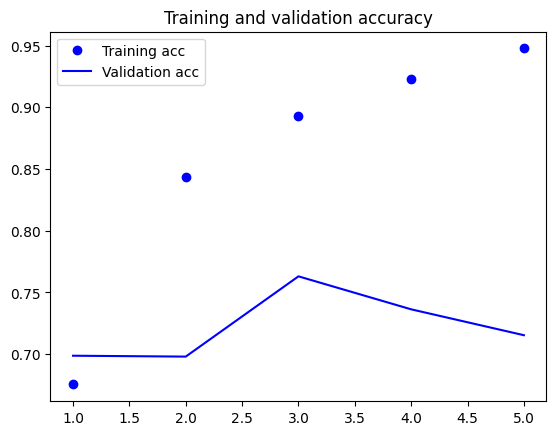

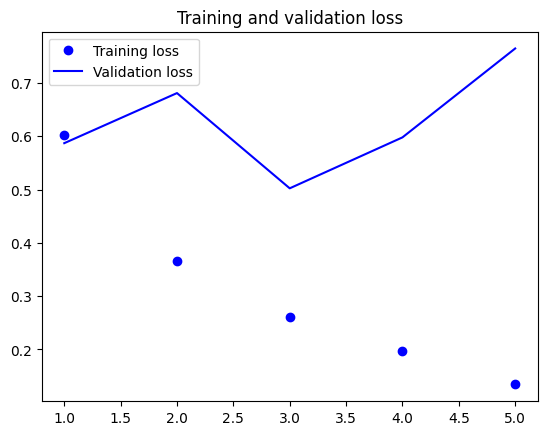

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Submit

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials
    
apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this specific Playground

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 5: 

#-- Generate predicted y values (Model 5)
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

57/57 [==============================] - 11s 164ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): \

Your model has been submitted as model version 233

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Model 7 More Dense layers

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 64, input_length=100))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(preprocessor(X_train), y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 64)           768000    
                                                                 
 lstm_35 (LSTM)              (None, 100, 32)           12416     
                                                                 
 lstm_36 (LSTM)              (None, 100, 64)           24832     
                                                                 
 lstm_37 (LSTM)              (None, 32)                12416     
                                                                 
 flatten_13 (Flatten)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 128)               4224      
                                                                 
 dense_17 (Dense)            (None, 64)              

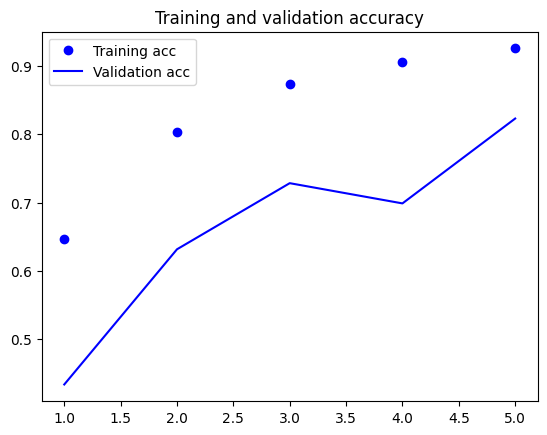

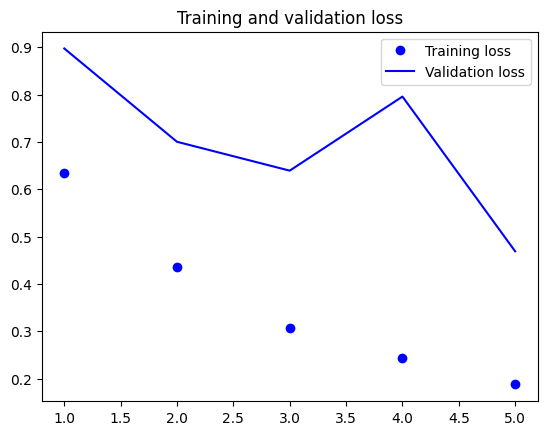

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Submit

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials
    
apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this specific Playground

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 6: 

#-- Generate predicted y values (Model 6)
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 6 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

57/57 [==============================] - 5s 67ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 234

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Discussion

My teammates and I get similar results. They are also stuck with how to improve our models. I try to tune dropout rates, improve number of epochs, use Bidirectional LSTM layers, and add more Dense layers on top of model. Improving number of epochs in transfer learning model seems to work well on train and validation data, but not on test data :( Increasing recurrent_dropout rate, adding more Dense layers, and Bidirectional LSTM improve prediction performance a bit.

# Final Discussion
Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.

I tried embedding and LSTM, Conv1D, and transfer learning with pretrained glove embeddings. My Conv1D model does not work well for this dataset. Adding more LSTM layers improves model performance. Transfer learning using pretrained embeddings does not help a lot. After discussing with my teammates, I tried to tune dropout rates, improve number of epochs, use Bidirectional LSTM layers, and add more Dense layers. Increasing recurrent_dropout rate, adding more LSTM and Dense layers are important for improving prediction performance. I will keep working on this and learn more from classmates.